In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
#from tensorflow.keras.layers import *
#from tensorflow.keras.models import *
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K 

# Helper libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


# From the tutorial
# https://www.machinecurve.com/index.php/2020/02/18/how-to-use-k-fold-cross-validation-with-keras/
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold

from datetime import datetime
from packaging import version

from packaging import version

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."

TensorFlow version:  2.1.0


In [2]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)


TensorBoard version:  2.6.0


In [3]:
#Load the TensorBoard notebook extension.
%load_ext tensorboard

In [4]:
from tbparse import SummaryReader
#log_dir = "logs/fit/SAM_Task1_20220403-154953"
#reader = SummaryReader(log_dir)
#df = reader.scalars
#print(df)

In [5]:
list_of_dir = ["fit/SAM_Task1_20220403-154953/train", "fit/SAM_Task2_20220403-155052/train", 
 "fit/TypicalANN_Task1_20220403-155137/train", "fit/TypicalANN_Task2_20220403-155338/train", 
 "fit/KASAM_Task1_20220403-155435/train", "fit/KASAM_Task2_20220403-155620/train", 
 "fit/KASAM_PR_Task1_20220403-155725/train", "fit/KASAM_PR_Task2_20220403-155911/train"]

In [6]:
training_time_labels = ['SAM','Typical ANN','KASAM','KASAM+PR']

In [7]:
dir_folders = ["logs/" + j for j in list_of_dir]

In [8]:
task_1_dir = dir_folders[::2]

task_1_df = [(SummaryReader(log_dir)).scalars.iloc[50:] for log_dir in task_1_dir]

In [9]:
task_2_dir = dir_folders[1::2]

task_2_df = [(SummaryReader(log_dir)).scalars.iloc[10:] for log_dir in task_2_dir]

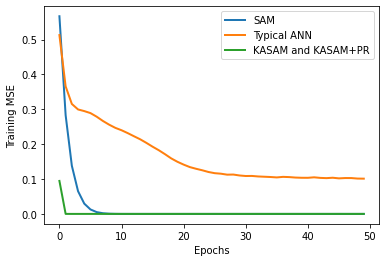

In [10]:
fig = plt.figure(10)

#sns.lineplot(x='x',y='y',data=df_true_function,color=sns.color_palette('Greens')[index0],linewidth=2)

for i in range(0,4):
    if i < 2:
        sns.lineplot(x='step', y='value',data=task_1_df[i],color=sns.color_palette("tab10")[i],
                     linewidth=2,zorder=i,label=training_time_labels[i])
    else: 
        sns.lineplot(x='step', y='value',data=task_1_df[i],color=sns.color_palette("tab10")[2],
                     linewidth=2,zorder=i,label="KASAM and KASAM+PR")
        break
    


#plt.legend()
#labels0 = []
#for j in strat_number:
#    labels0.append(str(j))
#labels0.append("Data")
    
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')

fig.gca().set(xlabel="Epochs", ylabel="Training MSE")
fig.savefig("KASAM_Paper_Two_Var_Results/training_time_task_1.png", dpi=500)

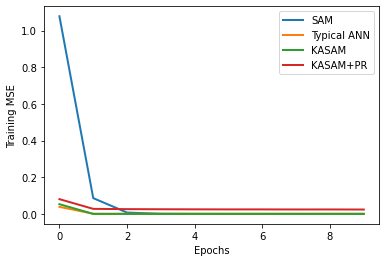

In [11]:
fig = plt.figure(10)

#sns.lineplot(x='x',y='y',data=df_true_function,color=sns.color_palette('Greens')[index0],linewidth=2)

for i in range(0,4):
    sns.lineplot(x='step', y='value',data=task_2_df[i],linewidth=2,zorder=i,label=training_time_labels[i])


#plt.legend()
#labels0 = []
#for j in strat_number:
#    labels0.append(str(j))
#labels0.append("Data")
    
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')

fig.gca().set(xlabel="Epochs", ylabel="Training MSE")
fig.savefig("KASAM_Paper_Two_Var_Results/training_time_task_2.png", dpi=500)

In [12]:
%tensorboard --logdir logs